In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [35]:
df=pd.read_csv('Dataset/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df=df[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [37]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [38]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [39]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:2],df.iloc[:,-1],test_size=0.2,random_state=42)

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Age PDF')

<Figure size 1008x288 with 0 Axes>

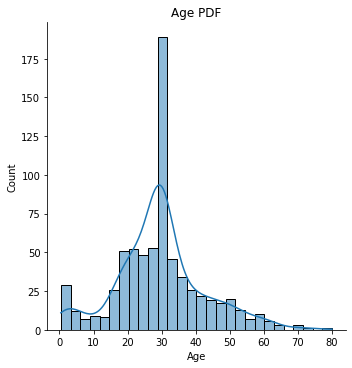

In [42]:
plt.figure(figsize=(14,4))
sns.displot(X_train['Age'],kde=True)
plt.title("Age PDF")


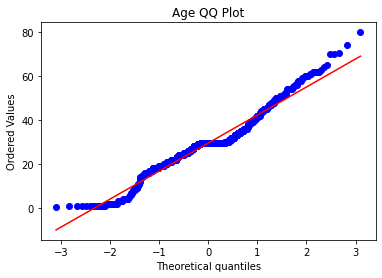

In [43]:

stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

Text(0.5, 1.0, 'Fare PDF')

<Figure size 1008x288 with 0 Axes>

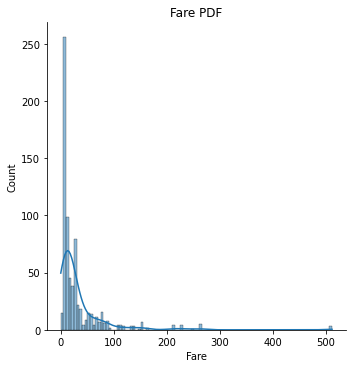

In [44]:
plt.figure(figsize=(14,4))
sns.displot(X_train['Fare'],kde=True)
plt.title("Fare PDF")

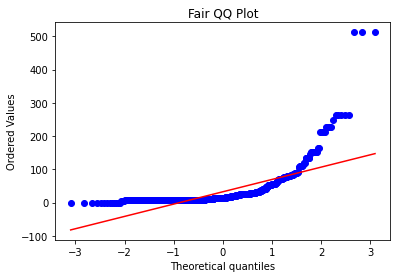

In [45]:

stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fair QQ Plot')
plt.show()

In [46]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)


DecisionTreeClassifier()

In [47]:
p=clf.predict(X_test)
p1=clf1.predict(X_test)

In [48]:
print("Logistic Regression ",accuracy_score(y_test,p))
print("DecisionTree ",accuracy_score(y_test,p1))

Logistic Regression  0.6480446927374302
DecisionTree  0.6815642458100558


In [49]:
fun=FunctionTransformer(func=np.log1p)


X_train_transformed=fun.fit_transform(X_train)
X_test_transformed=fun.transform(X_test)

In [50]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

p=clf.predict(X_test_transformed)
p1=clf1.predict(X_test_transformed)

In [51]:
print("Logistic Regression ",accuracy_score(y_test,p))
print("DecisionTree ",accuracy_score(y_test,p1))

Logistic Regression  0.6815642458100558
DecisionTree  0.6815642458100558


In [52]:
# after function transformer accuracy increases of LogisticRegression
# but not in DecisionTree